# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Описание данных


Признаки
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак
- Price — цена (евро)


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Библиотеки" data-toc-modified-id="Библиотеки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Библиотеки</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Проверка-пропусков" data-toc-modified-id="Проверка-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка пропусков</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Поиск-аномалий" data-toc-modified-id="Поиск-аномалий-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск аномалий</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Корреялционный-анализ" data-toc-modified-id="Корреялционный-анализ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Корреялционный анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выборка-для-обучения" data-toc-modified-id="Выборка-для-обучения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выборка для обучения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Анализ-модели" data-toc-modified-id="Анализ-модели-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ модели</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка данных

### Библиотеки

In [1]:
!pip install missingno -q
!pip install phik -q
!pip install category_encoders -q
!pip install scikit-learn==1.5.2 -q 
!pip install shap -q
!pip install matplotlib==3.7.3 -q 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math
from IPython.display import display
import seaborn as sns 
import missingno as msno

import phik

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.ensemble import IsolationForest
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import root_mean_squared_error

import shap

pd.options.display.max_columns = None
# Показывать только 5 цйфр после запятой
pd.options.display.precision = 5 # избавиться от научной нотации
# plt.rcParams["figure.figsize"] = (x,y)# значение размера графиков по умолч
pd.set_option('display.max_colwidth', None)

In [3]:
RANDOM_STATE = 42

### Загрузка данных

In [4]:
try:
    data = pd.read_csv('/datasets/autos.csv',parse_dates=['DateCrawled','DateCreated','LastSeen'])
except:
    print('smt wrong wih read')

In [5]:
display(data.head(5))
display(data.columns)
display(data.shape)
data.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

(354369, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

Количество строк 354369, всего признаков 16. В данных присутствуют пропуски. Тип данных верные, даты спарсены в формат datetime.

### Проверка пропусков

In [6]:
(data.isna().sum()/data.shape[0])*100

DateCrawled           0.00000
Price                 0.00000
VehicleType          10.57937
RegistrationYear      0.00000
Gearbox               5.59671
Power                 0.00000
Model                 5.56059
Kilometer             0.00000
RegistrationMonth     0.00000
FuelType              9.28270
Brand                 0.00000
Repaired             20.07907
DateCreated           0.00000
NumberOfPictures      0.00000
PostalCode            0.00000
LastSeen              0.00000
dtype: float64

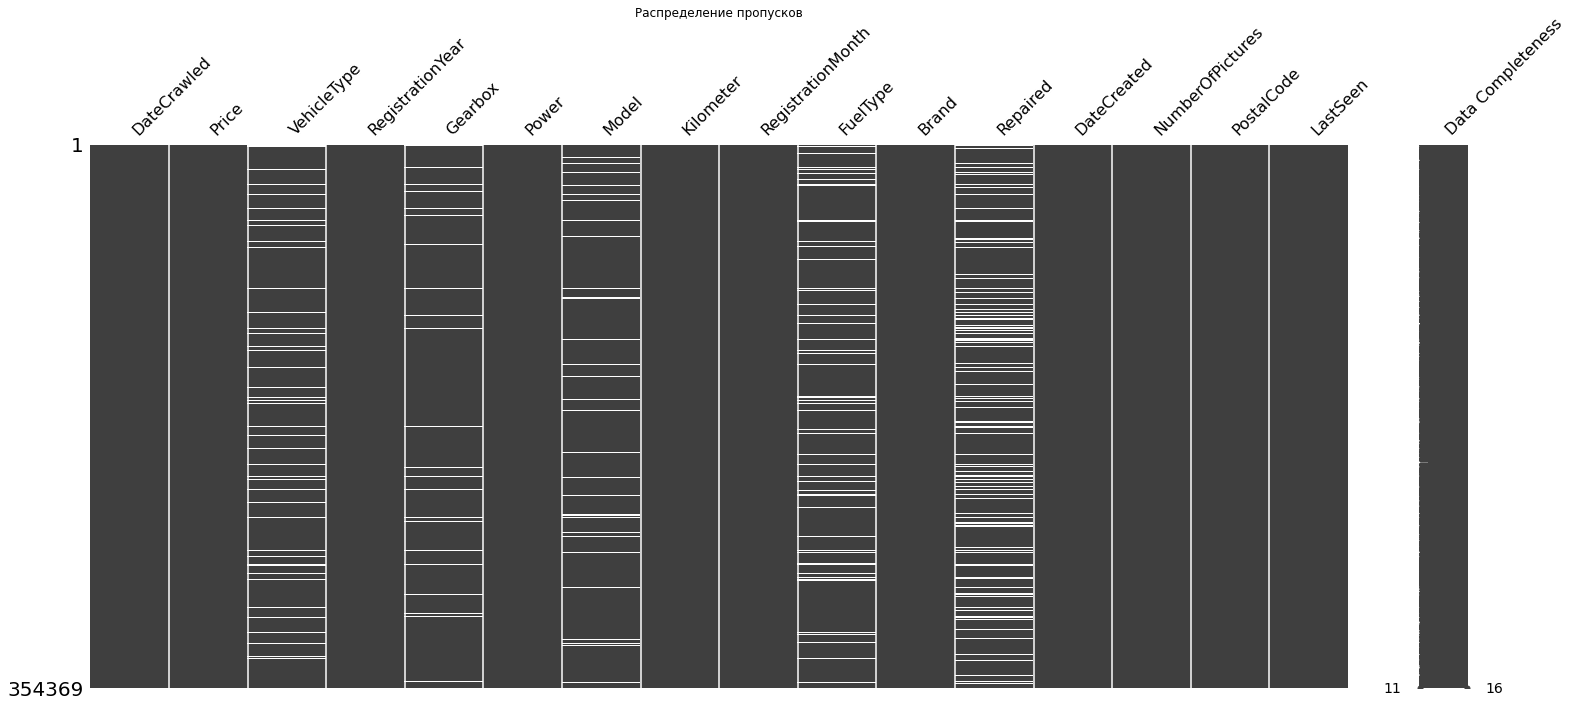

In [7]:
msno.matrix(data,labels=True)
plt.title('Распределение пропусков')
plt.show()

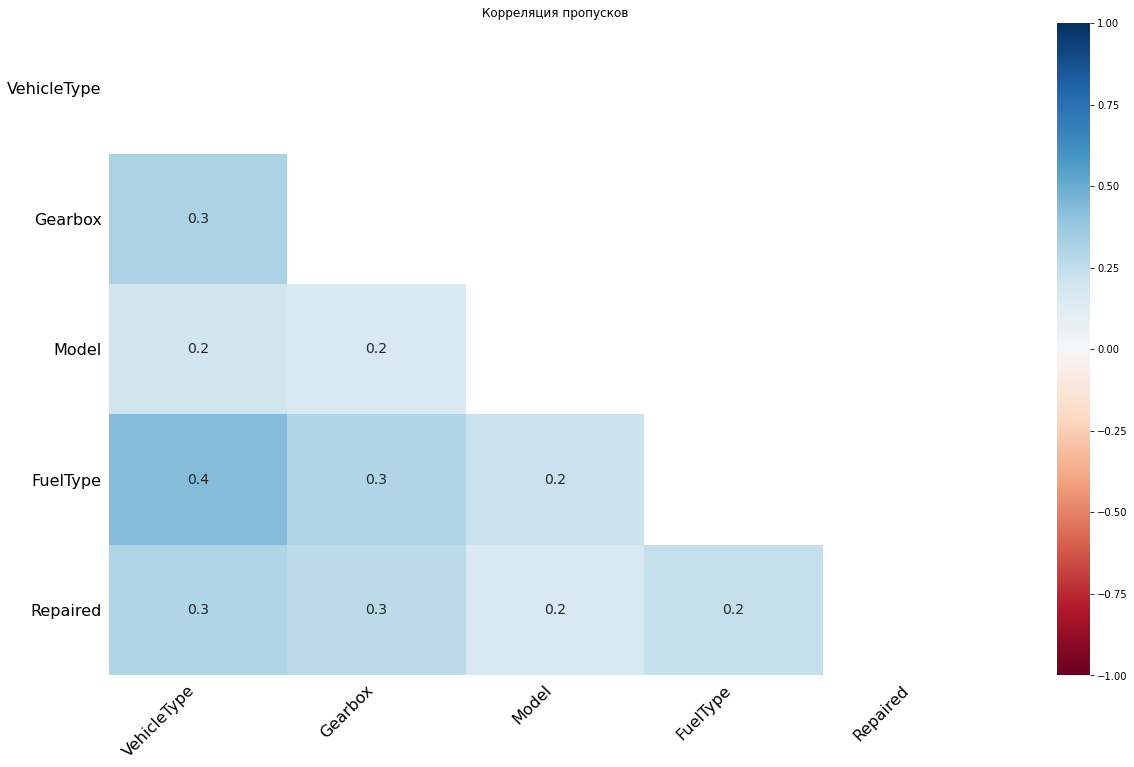

In [8]:
msno.heatmap(data)
plt.title('Корреляция пропусков')
plt.show()

**Вывод** Есть корреляция пропусков между VehicleType, FuelType и Gearbox. Пропуски в признаке Repaired распределены равномерно.

In [9]:
data[(data['VehicleType'].isna()) & (data['FuelType'].isna())].head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
26,2016-03-10 19:38:18,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10,0,31139,2016-03-16 09:16:46
52,2016-04-04 10:57:36,1400,NaN,2016,manual,55,other,5000,1,NaN,hyundai,NaN,2016-04-04,0,34454,2016-04-06 12:45:43
57,2016-03-10 20:53:19,2399,NaN,2018,manual,64,other,125000,3,NaN,seat,no,2016-03-10,0,33397,2016-03-25 10:17:37
65,2016-03-28 17:41:27,10900,NaN,2017,manual,101,astra,50000,3,NaN,opel,no,2016-03-28,0,63607,2016-04-06 23:15:52
71,2016-03-07 08:55:18,2300,NaN,1997,manual,150,5er,150000,3,NaN,bmw,no,2016-03-07,0,79341,2016-03-22 05:15:22
92,2016-03-16 07:56:19,250,NaN,2000,NaN,60,ka,150000,0,NaN,ford,NaN,2016-03-16,0,51427,2016-03-21 09:47:08
94,2016-03-28 16:37:43,8390,NaN,2009,NaN,0,insignia,150000,0,NaN,opel,NaN,2016-03-28,0,29221,2016-03-30 07:44:59
130,2016-03-20 18:47:31,3390,NaN,2000,NaN,0,3er,150000,2,NaN,bmw,NaN,2016-03-20,0,45739,2016-03-28 19:48:42
147,2016-03-15 12:50:00,300,NaN,2005,manual,0,punto,40000,9,NaN,fiat,yes,2016-03-15,0,26215,2016-03-25 04:19:17
154,2016-03-22 16:37:59,0,NaN,2006,NaN,0,other,5000,0,NaN,fiat,NaN,2016-03-22,0,44867,2016-04-06 06:17:56


In [10]:
col_ = data.select_dtypes(include='object').columns.tolist()
for i in col_:
    display(f'{i} {data[i].unique()}')

"VehicleType [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']"

"Gearbox ['manual' 'auto' nan]"

"Model ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'\n 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'\n 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'\n 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'\n 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'\n 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'\n 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'\n 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'\n 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'\n 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'\n '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'\n 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'\n 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse'\n '1_reihe' 'avensis' 'roomster' 'sl' 'kaefer' 'santa'

"FuelType ['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']"

"Brand ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'\n 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'\n 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'\n 'mitsubishi' 'kia' 'suzuki' 'lancia' 'toyota' 'chevrolet' 'dacia'\n 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'porsche'\n 'rover' 'land_rover' 'lada']"

"Repaired [nan 'yes' 'no']"

In [11]:
data = data.dropna(subset=['Model'])

In [12]:
(data.isna().sum()/data.shape[0])*100

DateCrawled           0.00000
Price                 0.00000
VehicleType           9.16203
RegistrationYear      0.00000
Gearbox               4.69187
Power                 0.00000
Model                 0.00000
Kilometer             0.00000
RegistrationMonth     0.00000
FuelType              7.68891
Brand                 0.00000
Repaired             18.55592
DateCreated           0.00000
NumberOfPictures      0.00000
PostalCode            0.00000
LastSeen              0.00000
dtype: float64

**Вывод** 
- Заменим в пайплайне пропуски VehicleType на затычку `other`
- Удалим данные, в которых отсутсвуют Model, так как не возможно установит рыночную стоимость автомобиля без этого признака
- FuelType, GearBox заполним часто встречаемыми значениями в пайплайне
- Repaired отсутствующие значения заполним на no
- Неявные дубликаты не обнаружены

### Дубликаты

In [13]:
data.duplicated().sum()

4

In [14]:
data = data.drop_duplicates()

In [15]:
data[data.duplicated(subset=['Model','Brand'],keep=False)].head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:06
10,2016-03-26 19:54:18,2000,sedan,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,2016-03-26,0,96224,2016-04-06 10:45:34


Полные дубликаты убраны

### Поиск аномалий 

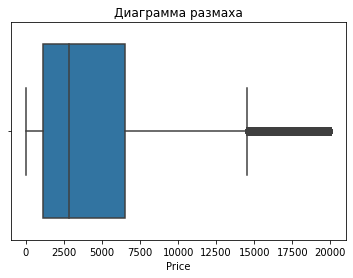

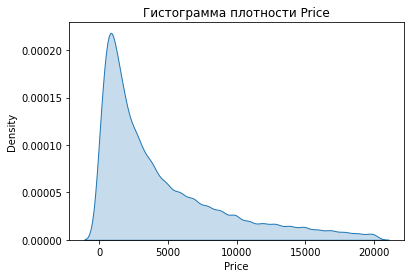

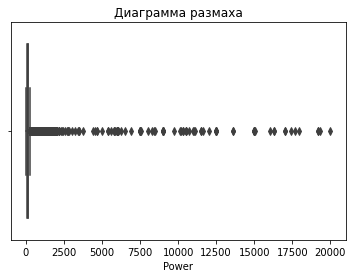

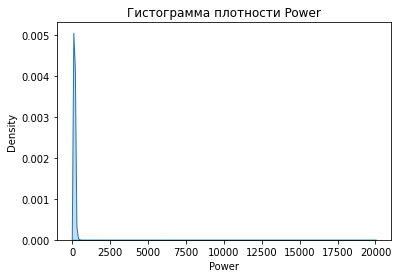

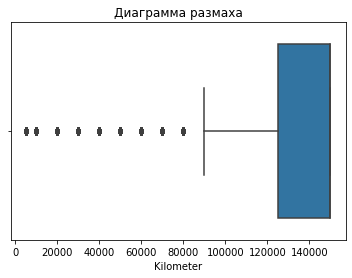

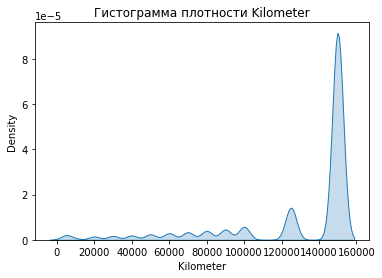

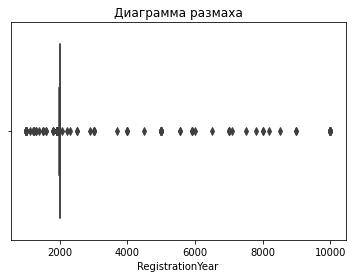

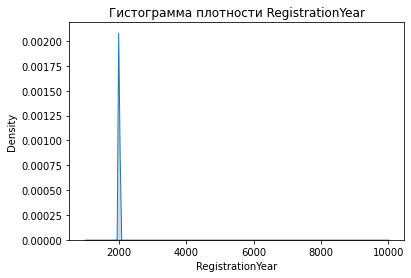

In [16]:
def anom(data):
    for i in data[['Price','Power','Kilometer','RegistrationYear']].columns.tolist():
        sns.boxplot(data=data,x=i)
        plt.title('Диаграмма размаха')
        plt.show()
        sns.kdeplot(data=data,x=i,shade=True)
        plt.title(f'Гистограмма плотности {i}')
        plt.show()
anom(data)

In [17]:
new_data = data[data['RegistrationYear'].between(1985,2016)].sort_values(by='RegistrationYear')

In [18]:
new_data['RegistrationYear'].value_counts().sort_index()

RegistrationYear
1985      628
1986      490
1987      612
1988      871
1989     1195
1990     2353
1991     2574
1992     2758
1993     3203
1994     4509
1995     8689
1996    10183
1997    13809
1998    16834
1999    21605
2000    22248
2001    19282
2002    18325
2003    19120
2004    19094
2005    21003
2006    19332
2007    16716
2008    15037
2009    14190
2010    10514
2011     9741
2012     7045
2013     4043
2014     2477
2015     1157
2016     8292
Name: count, dtype: int64

In [19]:
new_data['avg'] = new_data.groupby('Model')['Power'].transform('mean')

In [20]:
new_data['std'] = new_data.groupby('Model')['Power'].transform('std')

new_data['upper_3sigma'] = new_data['avg'] + 3 * new_data['std']

In [21]:
new_data['is_anomaly'] = new_data['Power'] > new_data['upper_3sigma']

In [22]:
new_data[new_data['is_anomaly']==True].head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,avg,std,upper_3sigma,is_anomaly
32784,2016-03-22 14:58:27,9500,bus,1986,auto,1659,other,40000,12,petrol,chevrolet,no,2016-03-22,0,56564,2016-04-07 03:46:46,117.61761,157.68664,590.67751,True
249238,2016-03-14 13:47:51,1250,suv,1987,manual,645,other,150000,5,petrol,suzuki,yes,2016-03-14,0,80331,2016-03-25 17:45:50,117.61761,157.68664,590.67751,True
143118,2016-03-31 13:53:03,6500,small,1987,manual,6018,cooper,60000,4,petrol,mini,NaN,2016-03-31,0,91126,2016-04-06 07:15:55,139.73354,149.20925,587.36129,True
284913,2016-04-03 11:55:34,1950,other,1988,manual,400,golf,5000,0,other,volkswagen,NaN,2016-04-03,0,27383,2016-04-07 13:16:00,97.72445,99.99856,397.72012,True
240432,2016-03-16 19:39:23,8800,coupe,1989,manual,283,kadett,5000,0,petrol,opel,NaN,2016-03-16,0,2956,2016-04-07 04:44:36,75.16842,45.75924,212.44614,True
187330,2016-03-17 19:50:23,1749,wagon,1989,manual,17019,3er,5000,12,petrol,bmw,NaN,2016-03-17,0,89542,2016-03-26 00:46:59,143.95313,175.72981,671.14257,True
249174,2016-03-30 21:58:00,5499,sedan,1989,manual,544,golf,150000,3,petrol,volkswagen,no,2016-03-30,0,84036,2016-04-05 12:20:52,97.72445,99.99856,397.72012,True
195064,2016-03-18 15:42:54,1800,sedan,1989,manual,1595,golf,40000,9,petrol,volkswagen,no,2016-03-18,0,79108,2016-03-27 23:15:37,97.72445,99.99856,397.72012,True
81940,2016-03-15 14:59:06,4999,NaN,1990,manual,500,golf,5000,0,NaN,volkswagen,NaN,2016-03-15,0,48477,2016-03-29 20:46:31,97.72445,99.99856,397.72012,True
134828,2016-03-29 16:44:34,9999,coupe,1990,auto,2789,s_klasse,150000,6,petrol,mercedes_benz,NaN,2016-03-29,0,71665,2016-04-06 02:16:00,236.91523,135.87465,644.53919,True


In [23]:
new_data[new_data['Power'] == 20000]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,avg,std,upper_3sigma,is_anomaly
219584,2016-03-09 15:43:53,4300,coupe,1999,auto,20000,clk,150000,1,petrol,mercedes_benz,no,2016-03-09,0,19406,2016-03-30 08:47:08,187.35791,474.65558,1611.32465,True


In [24]:
new_data[new_data['is_anomaly']==True]['is_anomaly'].count()

466

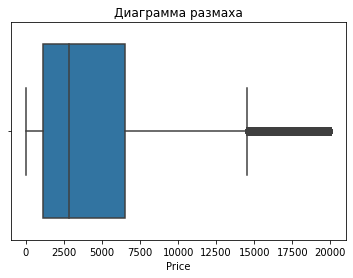

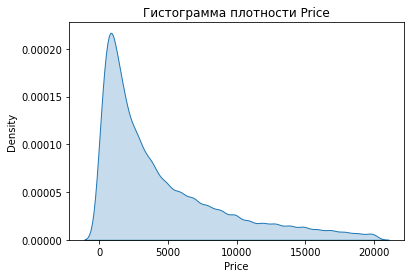

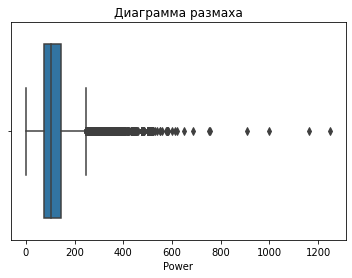

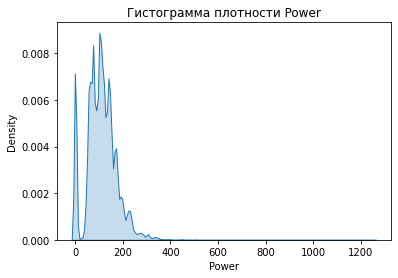

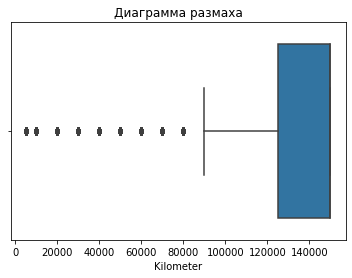

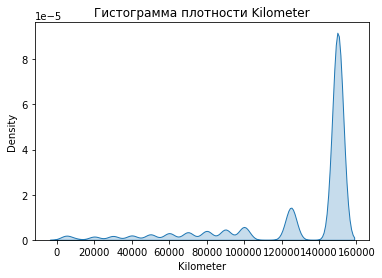

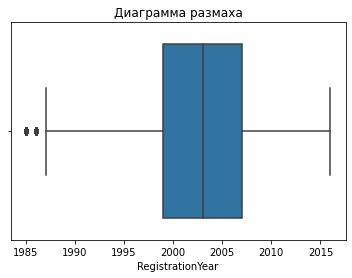

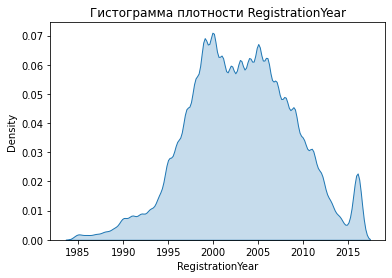

In [25]:
anom(new_data.query('is_anomaly==False'))

In [26]:
n = new_data.query('is_anomaly==False')

In [27]:
new_data = new_data.query('is_anomaly==False')

In [28]:
n[n['VehicleType']=='bus'].sort_values('Power',ascending=False).head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,avg,std,upper_3sigma,is_anomaly
342305,2016-03-22 09:57:36,2350,bus,2002,manual,1250,galaxy,150000,0,gasoline,ford,NaN,2016-03-22,0,52353,2016-03-26 10:46:54,129.13004,380.91061,1271.86187,False
98262,2016-03-10 23:43:32,2600,bus,2005,manual,1164,galaxy,150000,5,gasoline,ford,no,2016-03-10,0,52351,2016-04-01 11:16:25,129.13004,380.91061,1271.86187,False
291414,2016-03-23 23:54:29,12740,bus,2010,auto,356,other,150000,2,petrol,ford,yes,2016-03-23,0,3149,2016-04-04 16:18:28,117.61761,157.68664,590.67751,False
160192,2016-03-27 17:45:32,17500,bus,2004,auto,326,other,150000,4,gasoline,ford,no,2016-03-27,0,25821,2016-04-05 13:45:39,117.61761,157.68664,590.67751,False
3317,2016-03-30 10:50:11,7400,bus,2006,auto,313,touareg,150000,5,gasoline,volkswagen,no,2016-03-30,0,35759,2016-04-02 19:44:39,210.64161,110.56915,542.34906,False


In [29]:
data[(data['VehicleType']=='bus')].sort_values('Power',ascending=False).head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
292167,2016-03-21 12:49:22,2000,bus,2003,manual,12512,zafira,150000,12,petrol,opel,NaN,2016-03-21,0,52072,2016-04-06 07:45:32
205727,2016-03-12 11:43:29,4700,bus,1997,manual,10522,transporter,150000,0,gasoline,volkswagen,NaN,2016-03-12,0,87437,2016-03-12 11:43:29
96580,2016-03-12 10:36:18,4700,bus,1997,manual,10522,transporter,150000,0,gasoline,volkswagen,NaN,2016-03-12,0,87437,2016-03-12 10:36:18
25232,2016-03-28 19:57:39,10900,bus,2009,manual,10520,caddy,150000,6,gasoline,volkswagen,no,2016-03-28,0,36272,2016-04-07 02:47:02
277113,2016-03-19 16:49:47,2890,bus,2005,manual,9007,c_max,150000,2,petrol,ford,no,2016-03-19,0,25813,2016-03-19 16:49:47


In [30]:
new_data = new_data[new_data['Price']>1]

In [31]:
new_data = new_data.drop(['DateCrawled','RegistrationMonth','DateCreated','NumberOfPictures','PostalCode','LastSeen','avg','std','upper_3sigma','is_anomaly'],axis=1)

**Вывод**
- В колонке Price присутствуют выбросы со смещением вправо
- Power большой пик около 0, скорее всего это замененные, пустые данные
- Kilometer выбросы со смещением влево, большое количестов между 140 000 до 160 000км, так же есть пропуски 
- После обработки аномалий Isolation Forest распределения улучшилось
- Уберем значения Price равные 0
- По данным Автостата средний возраст легковых автомобилей 15.5, ограничим дипозоном

### Промежуточный вывод
- Есть корреляция пропусков между VehicleType, FuelType и Gearbox. Пропуски в признаке Repaired распределены равномерно.
- Полные дубликаты убраны
- В колонке Price присутствуют выбросы со смещением вправо
- Power большой пик около 0, скорее всего это замененные, пустые данные
- Kilometer выбросы со смещением влево, большое количестов между 140 000 до 160 000км, так же есть пропуски 
- После обработки аномалий Isolation Forest распределения улучшилось
- Уберем значения Price равные 0
- По данным Автостата средний возраст легковых автомобилей 15.5, ограничим дипозоном

## Обучение моделей

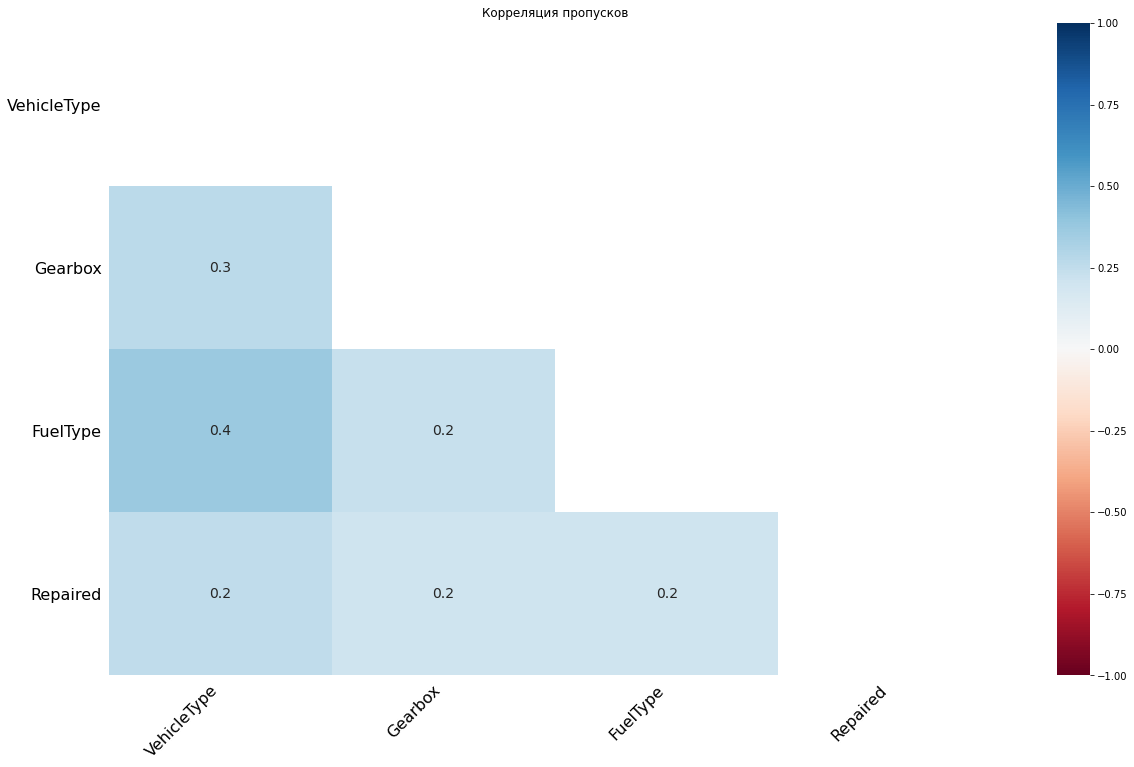

In [32]:
msno.heatmap(new_data)
plt.title('Корреляция пропусков')
plt.show()

### Корреялционный анализ

In [33]:
bins_= round(math.log2(new_data['Price'].count()+1))

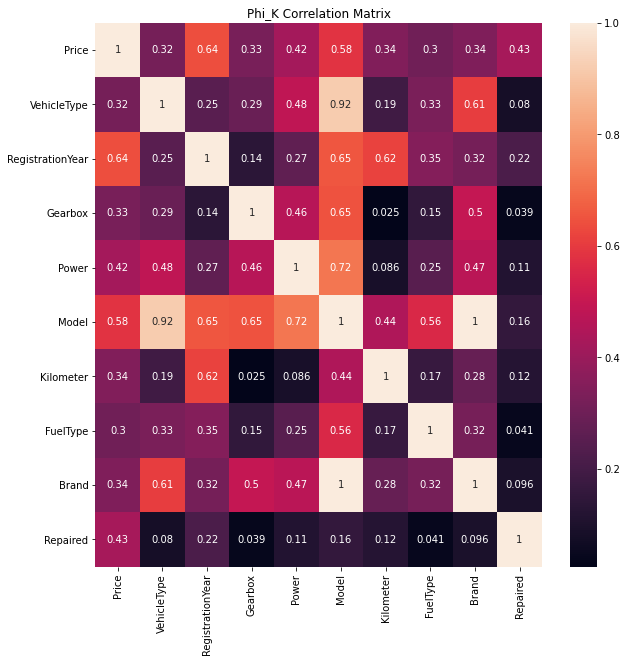

In [34]:
phik = new_data.phik_matrix(interval_cols = ['Price','Power'],
                                                    bins = {'Price':bins_,'Power':bins_})
plt.figure(figsize=(10,10))
sns.heatmap(phik, annot=True )
plt.title('Phi_K Correlation Matrix')
plt.show()

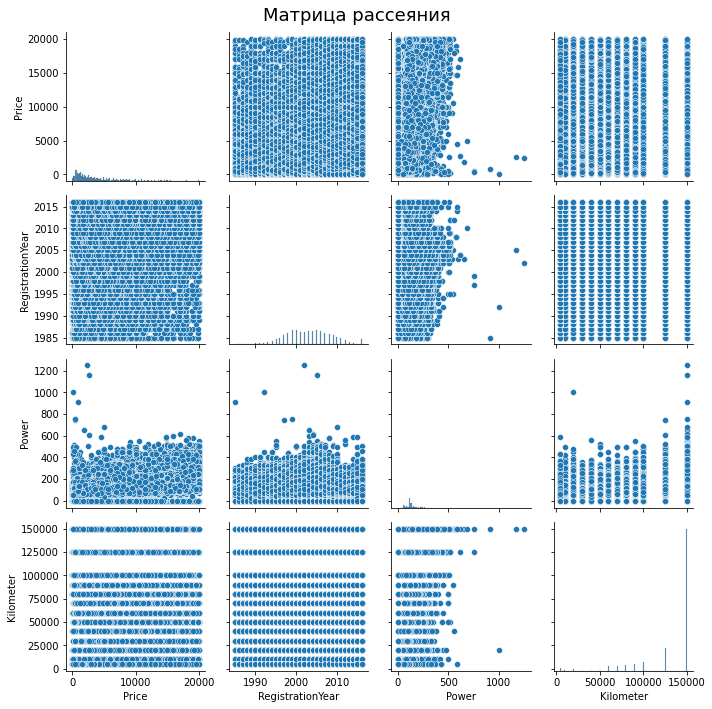

In [35]:
sns.pairplot(new_data)
plt.suptitle('Матрица рассеяния',fontsize=18)
plt.tight_layout()
plt.show()

#### Вывод
Прибыль имеет 
- Слабую корреляцию с VehicleType, Gearbox, Kilometer, Brand, Repaired
- Среднюю корреляцию с Power и Model
- Model и Brand имееют очень сильную корреляцию 1, поэтому оставим признак Model
- Power, VehicleType, Brand и Model очень сильно зависимы между собой, что логично модели автомобиля обычно имееют одну комплектацию, это создает проблему мультиколлинеарности для обучения для линейным моделей, но не для деревьев.

### Выборка для обучения

In [36]:
new_data = new_data.drop(['Brand'],axis=1)

In [37]:
new_data['AgeCat'] = pd.qcut(new_data['RegistrationYear'], q=6, labels=['супер_ретро', 'ретро', 'старая','отн_старая','отн_новая', 'новая'])

In [38]:
X = new_data.drop(['Price'],axis=1)
y = new_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
  test_size=0.25, 
  random_state=RANDOM_STATE)

In [39]:
X.head(3)

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Repaired,AgeCat
293385,sedan,1985,manual,90,other,80000,petrol,NaN,супер_ретро
291266,coupe,1985,manual,0,80,150000,petrol,no,супер_ретро
291257,sedan,1985,auto,102,3er,125000,petrol,NaN,супер_ретро


In [40]:
X['Repaired'].unique()

array([nan, 'no', 'yes'], dtype=object)

In [41]:
ohe_columns = ['Gearbox','Repaired'] #оставим бинарные признаки
cat_columns = ['FuelType','Model','AgeCat']
veh_columns = ['VehicleType']
num_columns = ['RegistrationYear','Power','Kilometer']

In [42]:
ohe_pipe_v = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, 
                                         strategy='constant', 
                                         fill_value='other')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ])
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ])
# cat_pipe = Pipeline(
#     [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')),
#      ('cat',)
#     ])
num_pipe =  Pipeline(
    [('simpleImputer', SimpleImputer(missing_values=np.nan, strategy='median'))
    ])

data_preprocessor = ColumnTransformer(
    [('ohe_v', ohe_pipe_v, veh_columns),
     ('ohe',   ohe_pipe,   ohe_columns),
     ('cat',   TargetEncoder(),   cat_columns),
     ('num',   num_pipe,   num_columns)
    ], 
    remainder='passthrough'
    )
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', lgb.LGBMRegressor(random_state=RANDOM_STATE))
])
param_grid = [
    {
    'models': [lgb.LGBMRegressor(random_state=RANDOM_STATE)],
    'models__max_depth': range(2, 5),
    'models__learning_rate': [0.01,0.05,0.1],
    'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough'],    
    },
    {
    'models':[RandomForestRegressor(random_state=RANDOM_STATE)],
    'models__max_depth': [3,5,10], 
    'models__min_samples_split': [2, 5, 10],
    'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']
    },
    {
    'models':[CatBoostRegressor(random_state=RANDOM_STATE,verbose=False)],
    'models__max_depth': range(2, 6),
    'models__learning_rate': [0.01,0.05,0.1],
    'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough'],
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    error_score='raise'

)
randomized_search.fit(X_train, y_train)

print ('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_v',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(fill_value='other',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['VehicleType']),
                                                 ('ohe',
                 

In [50]:
models = pd.DataFrame(randomized_search.cv_results_)
models.sort_values(by='rank_test_score',ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__max_depth,param_models__learning_rate,param_models,param_models__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,17.51480,0.41417,0.44047,0.01051,RobustScaler(),4,0.05,<catboost.core.CatBoostRegressor object at 0x7f6dc4731910>,NaN,"{'preprocessor__num': RobustScaler(), 'models__max_depth': 4, 'models__learning_rate': 0.05, 'models': <catboost.core.CatBoostRegressor object at 0x7f6dc4731910>}",-1672.21226,-1658.09046,-1659.77231,-1663.35834,6.29820,1
7,15.05735,0.24531,0.43120,0.00215,RobustScaler(),2,0.10,<catboost.core.CatBoostRegressor object at 0x7f6dc4731910>,NaN,"{'preprocessor__num': RobustScaler(), 'models__max_depth': 2, 'models__learning_rate': 0.1, 'models': <catboost.core.CatBoostRegressor object at 0x7f6dc4731910>}",-1760.53884,-1746.14610,-1748.14166,-1751.60887,6.36678,2
1,22.80968,0.40410,0.75206,0.01199,passthrough,10,NaN,RandomForestRegressor(random_state=42),2.0,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 2, 'models__max_depth': 10, 'models': RandomForestRegressor(random_state=42)}",-1787.90654,-1772.78697,-1779.54988,-1780.08113,6.18396,3
9,18.94478,0.23069,0.43945,0.00731,RobustScaler(),5,0.01,<catboost.core.CatBoostRegressor object at 0x7f6dc4731910>,NaN,"{'preprocessor__num': RobustScaler(), 'models__max_depth': 5, 'models__learning_rate': 0.01, 'models': <catboost.core.CatBoostRegressor object at 0x7f6dc4731910>}",-1788.48109,-1781.56637,-1785.97619,-1785.34122,2.85841,4
8,14.63543,0.08895,0.41715,0.00425,passthrough,2,0.05,<catboost.core.CatBoostRegressor object at 0x7f6dc4731910>,NaN,"{'preprocessor__num': 'passthrough', 'models__max_depth': 2, 'models__learning_rate': 0.05, 'models': <catboost.core.CatBoostRegressor object at 0x7f6dc4731910>}",-1811.05349,-1798.82993,-1802.60987,-1804.16443,5.10988,5


### Вывод 
Лучшая модель и параметры, RMSE = 1672
- 'preprocessor__num': RobustScaler(), 
- 'models__max_depth': 4, 'models__learning_rate': 0.05
- 'models': CatBoostRegressor

## Анализ моделей

In [52]:
models.sort_values(by=['rank_test_score'],ascending=[True]).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__max_depth,param_models__learning_rate,param_models,param_models__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,17.51480,0.41417,0.44047,0.01051,RobustScaler(),4,0.05,<catboost.core.CatBoostRegressor object at 0x7f6dc4731910>,NaN,"{'preprocessor__num': RobustScaler(), 'models__max_depth': 4, 'models__learning_rate': 0.05, 'models': <catboost.core.CatBoostRegressor object at 0x7f6dc4731910>}",-1672.21226,-1658.09046,-1659.77231,-1663.35834,6.29820,1
7,15.05735,0.24531,0.43120,0.00215,RobustScaler(),2,0.10,<catboost.core.CatBoostRegressor object at 0x7f6dc4731910>,NaN,"{'preprocessor__num': RobustScaler(), 'models__max_depth': 2, 'models__learning_rate': 0.1, 'models': <catboost.core.CatBoostRegressor object at 0x7f6dc4731910>}",-1760.53884,-1746.14610,-1748.14166,-1751.60887,6.36678,2
1,22.80968,0.40410,0.75206,0.01199,passthrough,10,NaN,RandomForestRegressor(random_state=42),2.0,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 2, 'models__max_depth': 10, 'models': RandomForestRegressor(random_state=42)}",-1787.90654,-1772.78697,-1779.54988,-1780.08113,6.18396,3


In [53]:
models.sort_values(by=['mean_fit_time'],ascending=True).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__max_depth,param_models__learning_rate,param_models,param_models__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.49131,2.05412,0.40426,0.00266,passthrough,2,0.10,LGBMRegressor(random_state=42),NaN,"{'preprocessor__num': 'passthrough', 'models__max_depth': 2, 'models__learning_rate': 0.1, 'models': LGBMRegressor(random_state=42)}",-1968.40772,-1955.26711,-1967.14675,-1963.60719,5.91976,8
4,8.68691,0.17450,0.33235,0.00644,RobustScaler(),3,NaN,RandomForestRegressor(random_state=42),2.0,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 2, 'models__max_depth': 3, 'models': RandomForestRegressor(random_state=42)}",-2793.87900,-2815.99296,-2797.48538,-2802.45245,9.68713,10
8,14.63543,0.08895,0.41715,0.00425,passthrough,2,0.05,<catboost.core.CatBoostRegressor object at 0x7f6dc4731910>,NaN,"{'preprocessor__num': 'passthrough', 'models__max_depth': 2, 'models__learning_rate': 0.05, 'models': <catboost.core.CatBoostRegressor object at 0x7f6dc4731910>}",-1811.05349,-1798.82993,-1802.60987,-1804.16443,5.10988,5


In [54]:
models.sort_values(by=['mean_score_time'],ascending=True).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__max_depth,param_models__learning_rate,param_models,param_models__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,8.68691,0.17450,0.33235,0.00644,RobustScaler(),3,NaN,RandomForestRegressor(random_state=42),2.0,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 2, 'models__max_depth': 3, 'models': RandomForestRegressor(random_state=42)}",-2793.87900,-2815.99296,-2797.48538,-2802.45245,9.68713,10
0,3.49131,2.05412,0.40426,0.00266,passthrough,2,0.10,LGBMRegressor(random_state=42),NaN,"{'preprocessor__num': 'passthrough', 'models__max_depth': 2, 'models__learning_rate': 0.1, 'models': LGBMRegressor(random_state=42)}",-1968.40772,-1955.26711,-1967.14675,-1963.60719,5.91976,8
8,14.63543,0.08895,0.41715,0.00425,passthrough,2,0.05,<catboost.core.CatBoostRegressor object at 0x7f6dc4731910>,NaN,"{'preprocessor__num': 'passthrough', 'models__max_depth': 2, 'models__learning_rate': 0.05, 'models': <catboost.core.CatBoostRegressor object at 0x7f6dc4731910>}",-1811.05349,-1798.82993,-1802.60987,-1804.16443,5.10988,5


Вывод
- Наилучшая модель по метрики RMSE на валидационной выборке CatBoostRegressor
 - 'models__max_depth': 4, 'models__learning_rate': 0.05
- Наилучшая модель по скорости обучения LGBMRegressor 
 - 'models__max_depth': 2, 'models__learning_rate': 0.1
- Наилучшая модель по скорости предсказания  LGBMRegressor
  -'models__max_depth': 2, 'models__learning_rate': 0.1

In [63]:
final = pd.DataFrame({
    'Models':['CatBoostRegressor','LGBMRegressor','RandomForestRegressor'],
    'RMSE_mean':['1663','1964','2802'],
    'Fit_time_mean':['17.5','3.5','8.7'],
    'Predict_time_mean':['0.44047','0.40426','0.33235']
})

In [64]:
final

,Models,RMSE_mean,Fit_time_mean,Predict_time_mean
0,CatBoostRegressor,1663,17.5,0.44047
1,LGBMRegressor,1964,3.5,0.40426
2,RandomForestRegressor,2802,8.7,0.33235


In [66]:
%%time
final_model = randomized_search.best_estimator_
final_model.fit(X_train,y_train)

CPU times: user 26.5 s, sys: 153 ms, total: 26.6 s
Wall time: 27.7 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_v',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(fill_value='other',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['VehicleType']),
                                                 ('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gearbox', 'Repaired']),
                                                 ('cat', TargetEncoder(),
                                                  ['FuelType', 'Model',
                                                   'AgeCat']),
                                                 ('num', RobustScaler(),
                                                  ['RegistrationYear', 'Power',
                                                   'Kilometer'])])),
                ('models',
                 <catboost.core.CatBoostRegressor object at 0x7f6dc6662250>)])

In [67]:
%%time
y_pred_t = final_model.predict(X_test)
root_mean_squared_error(y_test,y_pred_t)

CPU times: user 449 ms, sys: 3.92 ms, total: 453 ms
Wall time: 458 ms


1671.3922314138076

### Анализ признаков

In [75]:
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
X_train_p = preprocessor.fit_transform(X_train,y_train)
X_test_p = preprocessor.transform(X_test)

In [86]:
m = randomized_search.best_estimator_.named_steps['models']

  0%|          | 0/30 [00:00<?, ?it/s]

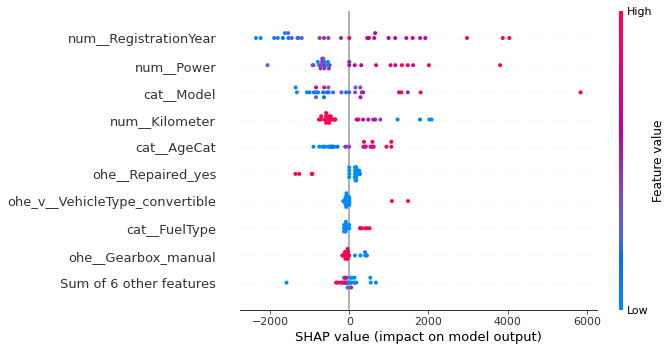

In [96]:
explainer = shap.KernelExplainer(m.predict, shap.sample(X_test_p,30),preprocessor.get_feature_names_out())
shap_val = explainer(shap.sample(X_test_p,30))
shap.plots.beeswarm(shap_val)

  0%|          | 0/30 [00:00<?, ?it/s]

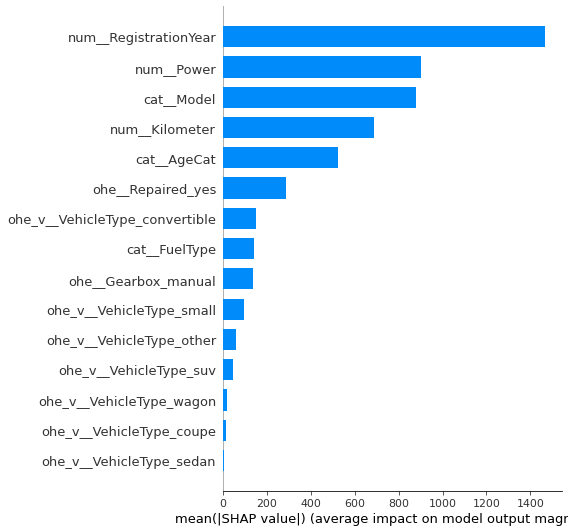

In [102]:
shap_values = explainer(shap.sample(X_test_p,30))
shap.summary_plot(shap_values, shap.sample(X_test_p,30), plot_type="bar", 
                  feature_names=preprocessor.get_feature_names_out())

### Вывод
Лучшая модель CatboostRegressor с глубиной 4 learning_rate 0.05 по метрики RMSE
- RMSE 1671, Время обучения 27s, Время предсказания 0.45s
- Наибольший вклад год регистрации автомобиля
- Имеющие одинаковый вклад в предсказание мощность, модель, километраж  по убыванию значимости.

## Общий вывод

### Предобработка данных
- Есть корреляция пропусков между VehicleType, FuelType и Gearbox. Пропуски в признаке Repaired распределены равномерно.
- Полные дубликаты убраны
- В колонке Price присутствуют выбросы со смещением вправо
- Power большой пик около 0, скорее всего это замененные, пустые данные
- Kilometer выбросы со смещением влево, большое количестов между 140 000 до 160 000км, так же есть пропуски 
- После обработки аномалий Isolation Forest распределения улучшилось
- Уберем значения Price равные 0
- По данным Автостата средний возраст легковых автомобилей 15.5, ограничим дипозоном

### Корреляционный анализ
Прибыль имеет 
- Слабую корреляцию с VehicleType, Gearbox, Kilometer, Brand, Repaired
- Среднюю корреляцию с Power и Model
- Model и Brand имееют очень сильную корреляцию 1, поэтому оставим признак Model
- Power, VehicleType, Brand и Model очень сильно зависимы между собой, что логично модели автомобиля обычно имееют одну комплектацию, это создает проблему мультиколлинеарности для обучения для линейным моделей, но не для деревьев.

### Обучение модели
Лучшая модель по метрике RMSE CatBoostRegressor с параметрами, 
- RMSE = 1563
- 'preprocessor__num': StandardScaler(), 
- 'models__max_depth': 5, 'models__learning_rate': 0.1, 
- 'models': CatBoostRegressor

### Анализ модели
Лучшая модель CatboostRegressor с глубиной 4 learning_rate 0.05 по метрики RMSE

- RMSE 1671, Время обучения 27s, Время предсказания 0.45s
- Наибольший вклад год регистрации автомобиля
- Имеющие одинаковый вклад в предсказание мощность, модель, километраж  по убыванию значимости.


Проведена очистка данных. Были обучены несколько моделей для предсказания цены автомобиля. Протестированы модели Catboost,LGBM,RandomForest на необходимые критерии 
- качество предсказания;
- время обучения модели;
- время предсказания модели.  
Наилучшие результаты по точности показал CatBoostRegressor 

Модель CatBoostRegressor удовлетворяет ключевые цели заказчика 

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей